In [3]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

In [4]:
data = pd.read_csv('GOOG.csv')
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])  # Ensure the date column is in datetime format
df = new_data_df.set_index('Date')  # Set the date column as the index of the DataFrame

# Agregați datele în time frame-uri săptămânale
df_weekly = df.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df = df_weekly

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2108 non-null   object 
 1   Price   2108 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.1+ KB
                 Price
Date                  
2015-01-04   26.378078
2015-01-11   25.410336
2015-01-18   24.871814
2015-01-25   25.870473
2015-02-01   26.109716
...                ...
2023-04-23  105.476999
2023-04-30  106.250002
2023-05-07  106.616002
2023-05-14  111.197000
2023-05-21  117.833333

[438 rows x 1 columns]


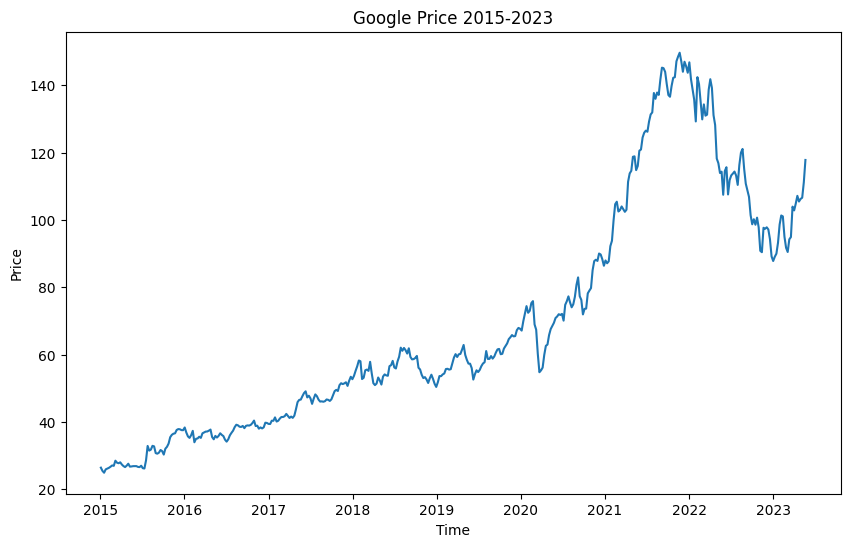

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Price'])
plt.title('Google Price 2015-2023')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

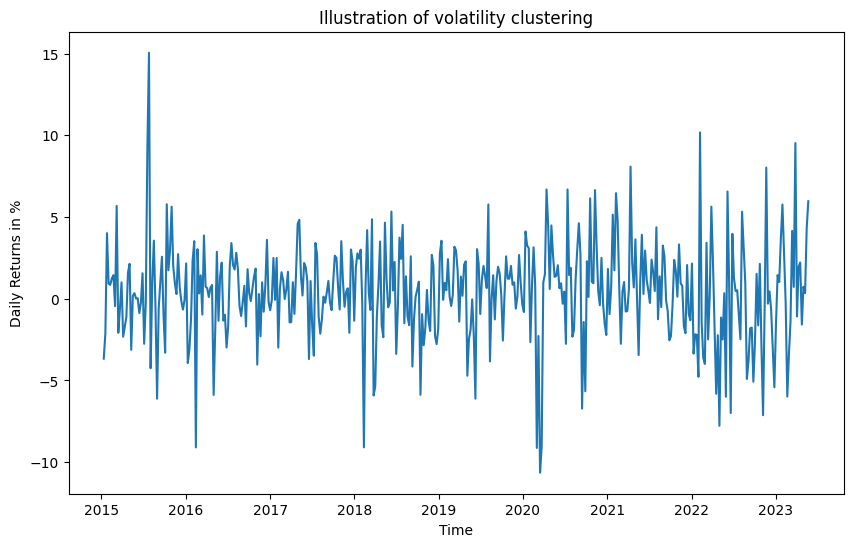

In [6]:
# df is your DataFrame and 'price' is the column with the time series
df['return_prc'] = df['Price'].pct_change()*100

plt.figure(figsize=(10, 6))
plt.plot(df['return_prc'])
plt.title('Illustration of volatility clustering')
plt.xlabel('Time')
plt.ylabel('Daily Returns in %')
plt.show()

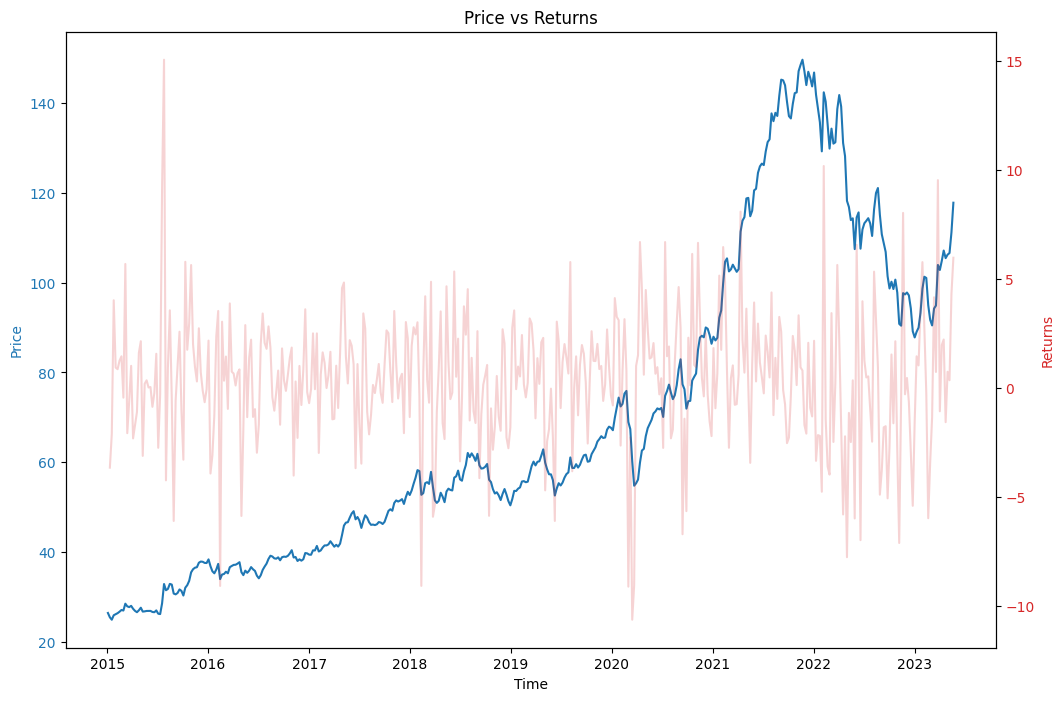

In [7]:
# Setăm dimensiunea figurii și rezoluția
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100)

# Trasăm prețul real pe axa stângă
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color=color)
ax1.plot(df['Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Cream axa dreapta pentru randamente
ax2 = ax1.twinx()

# Trasăm randamentele pe axa dreaptă cu o opacitate redusă
color = 'tab:red'
ax2.set_ylabel('Returns', color=color)
ax2.plot(df['return_prc'], color=color, alpha=0.2)  # Modificăm valoarea alpha
ax2.tick_params(axis='y', labelcolor=color)

# Adăugăm titlul graficului
plt.title('Price vs Returns')
plt.show()

In [8]:
df = df.dropna()
df.head()

,Price,return_prc
Date,,
2015-01-11,25.410336,-3.668735
2015-01-18,24.871814,-2.119302
2015-01-25,25.870473,4.015221
2015-02-01,26.109716,0.924773
2015-02-08,26.331706,0.850221


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


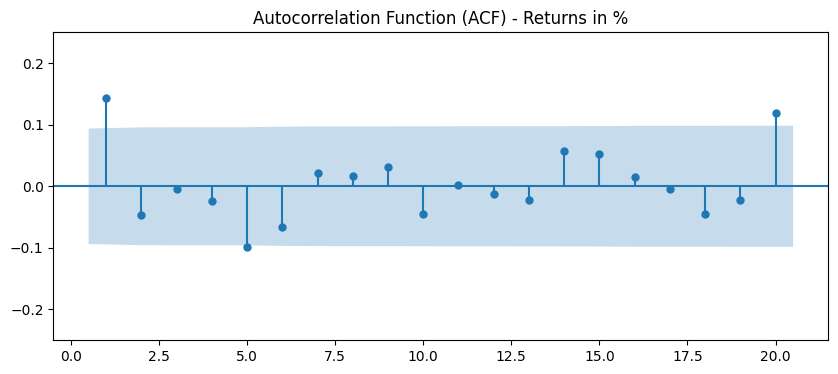

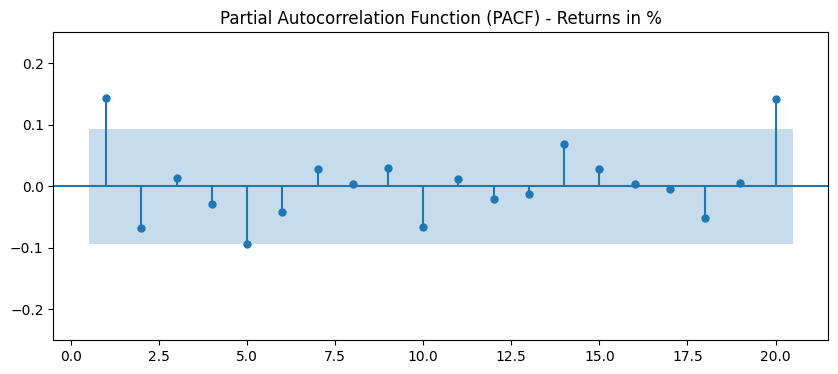

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Definim seria de timp a randamentului în procente
returns_pct = df['return_prc']

# Calculăm ACF și PACF
fig, ax1 = plt.subplots(figsize=(10, 4))
lag_acf = plot_acf(returns_pct, lags=20, zero=False, ax=ax1)
ax1.set_ylim(-0.25, 0.25)

fig, ax2 = plt.subplots(figsize=(10, 4))
lag_pacf = plot_pacf(returns_pct, lags=20, zero=False, ax=ax2)
ax2.set_ylim(-0.25, 0.25)

# Adăugăm titluri la grafice
ax1.set_title('Autocorrelation Function (ACF) - Returns in %')
ax2.set_title('Partial Autocorrelation Function (PACF) - Returns in %')

# Afișăm graficele
plt.show()

In [10]:
import warnings
from arch import arch_model

# Lista pentru a stoca rezultatele modelelor
results = []

# Loop prin valorile lui p
for p in range(1, 12):
    try:
        # Fit the ARCH(p) model
        model = arch_model(df['return_prc'], vol='ARCH', p=p)
        model_fit = model.fit(disp='off')
        
        # Calculate the AIC
        aic = model_fit.aic
        
        # Append the results to the list
        results.append((p, aic))
    
    except:
        # In cazul in care modelul nu poate fi potrivit, adaugam o valoare mare pentru AIC
        results.append((p, float('inf')))

# Sortam rezultatele in ordine descrescatoare dupa AIC
results.sort(key=lambda x: x[1])

# Afisam rezultatele
for result in results:
    print(f"ARCH({result[0]}) - AIC: {result[1]}")

ARCH(5) - AIC: 2185.469204536447
ARCH(6) - AIC: 2186.141793972143
ARCH(2) - AIC: 2186.2069623621346
ARCH(3) - AIC: 2187.120051621966
ARCH(7) - AIC: 2187.92497606908
ARCH(4) - AIC: 2188.9617475645164
ARCH(8) - AIC: 2189.8945387483545
ARCH(9) - AIC: 2191.8945380648884
ARCH(1) - AIC: 2191.9242607110536
ARCH(10) - AIC: 2193.848904118744
ARCH(11) - AIC: 2194.3524467510347


In [11]:
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

In [12]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [13]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [14]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f} \nHurst: {round(hurst(x.values),2)}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    # Setează limita pe axa OY la +-0.25
    axes[1][0].set_ylim([-0.25, 0.25])
    axes[1][1].set_ylim([-0.25, 0.25])
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


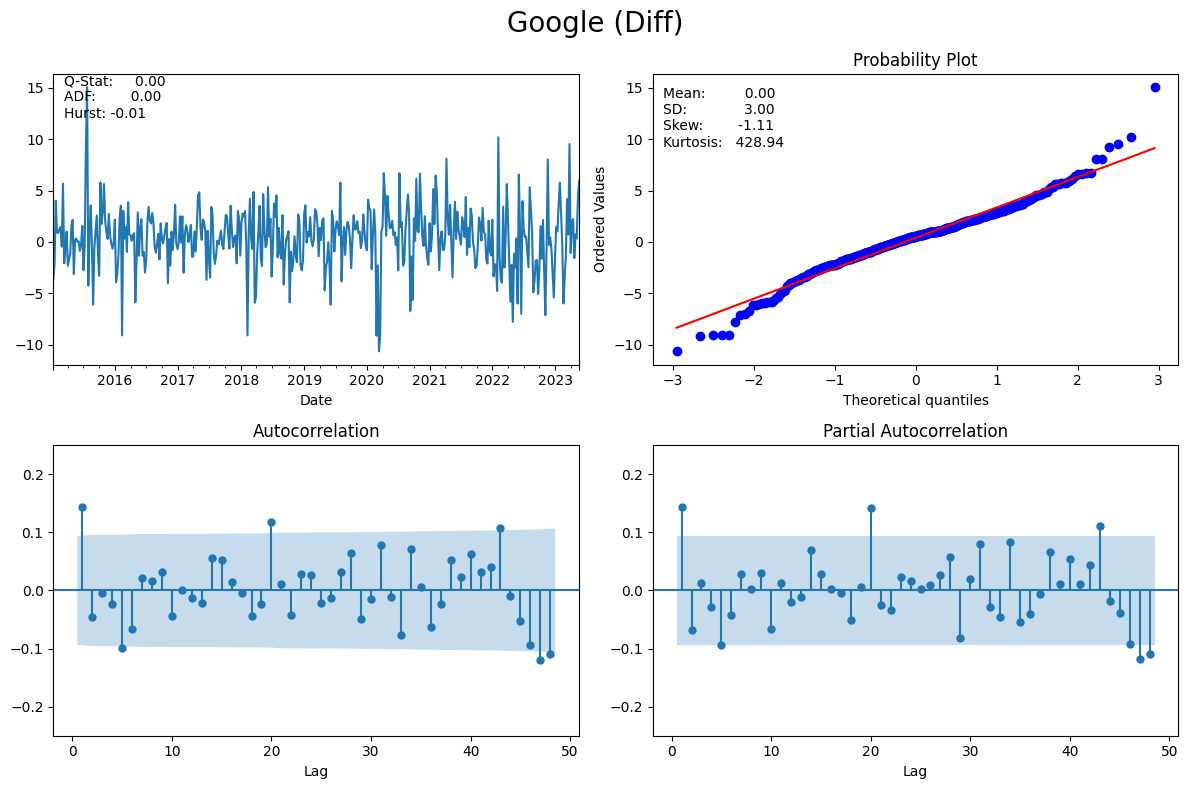

In [15]:
# Plot ACF, PACF and Q-Q plot and get ADF p-value of series
plot_correlogram(df['return_prc'], lags=48, title='Google (Diff)')

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


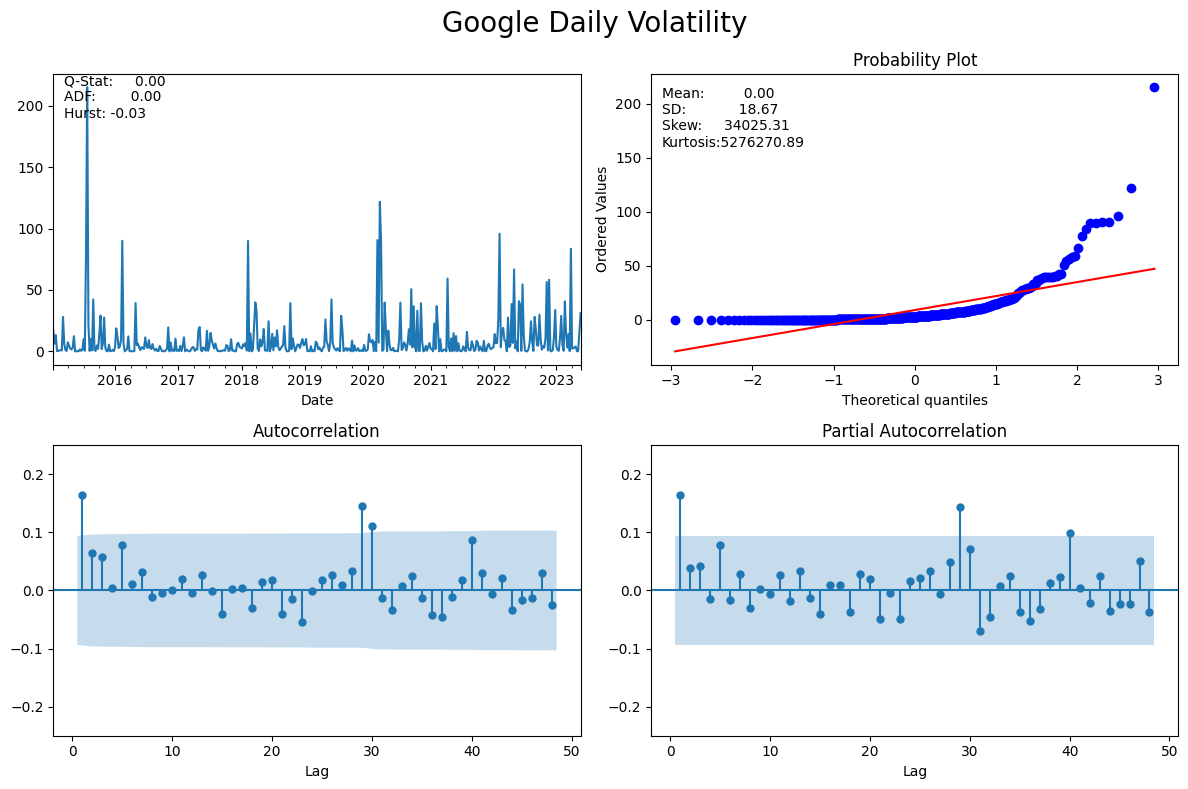

In [16]:
plot_correlogram(df['return_prc'].sub(df['return_prc'].mean()).pow(2), lags=48, title='Google Daily Volatility')

In [17]:
df['volatility'] = df['return_prc'] **2

C:\Users\razva\AppData\Local\Temp\ipykernel_29004\1758454661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volatility'] = df['return_prc'] **2


In [18]:
# Specify GARCH model assumptions
basic_gm = arch_model(df['return_prc'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     27,   Neg. LLF: 1114.9499106063372
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1086.9355125140983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1086.9355115152794
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


In [19]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             return_prc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1086.94
Distribution:                  Normal   AIC:                           2181.87
Method:            Maximum Likelihood   BIC:                           2198.19
                                        No. Observations:                  437
Date:                Wed, May 24 2023   Df Residuals:                      436
Time:                        22:10:40   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4576      0.143      3.192  1.412e-03 [  0.177,  0.73

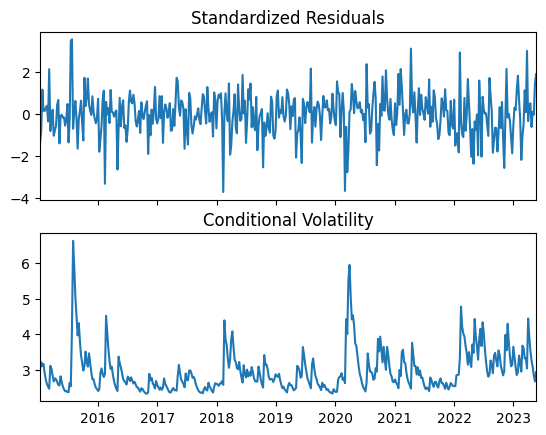

In [20]:
# Plot fitted results
gm_result.plot()
plt.show()

In [21]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                  h.1        h.2        h.3        h.4        h.5
Date                                                             
2023-05-21  11.818722  11.379282  11.014978  10.712962  10.462585


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


C:\Users\razva\AppData\Local\Temp\ipykernel_29004\4267352897.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')


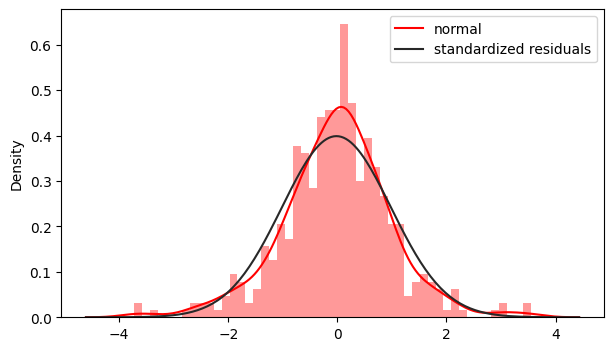

In [22]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

In [23]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['return_prc'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


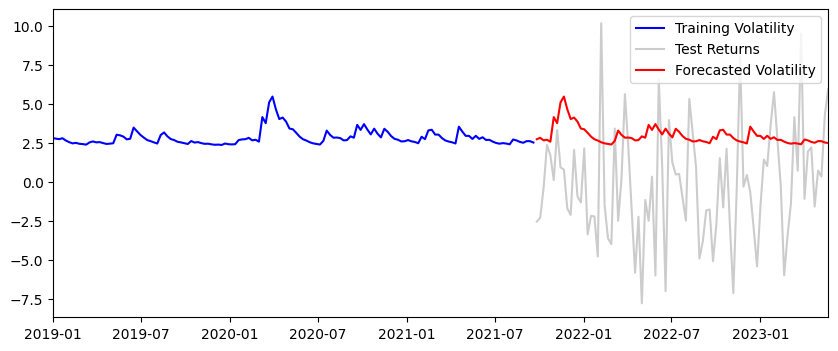

In [45]:
# Import the necessary library
from arch import arch_model
import matplotlib.pyplot as plt
import datetime

# Number of observations in the test data
test_size = int(len(df) * 0.2)

# Split the data into training and test data
train, test = df[:-test_size], df[-test_size:]

# Specify the model
gm = arch_model(train['return_prc'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt')

# Fit the model
model_fit = gm.fit(disp='off')

# Forecast volatility
forecasts = model_fit.forecast(start=0, horizon=1)

# Get the forecasted volatility
forecasted_vol = np.sqrt(forecasts.variance)

# Plot the results
plt.figure(figsize=(10,4))
plt.plot(train.index, model_fit.conditional_volatility, color='blue', label='Training Volatility')
plt.plot(test.index, test['return_prc'], color='grey', label='Test Returns', alpha=0.4)
plt.plot(test.index, forecasted_vol.iloc[-test_size:, -1], color='red', label='Forecasted Volatility')
plt.legend(loc='upper right')
start_date = '2019-01-01'
plt.xlim(pd.to_datetime(start_date), test.index.max())
plt.show()

In [32]:
# Display model fitting summary
print(skewt_result.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                        return_prc   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1072.40
Distribution:      Standardized Skew Student's t   AIC:                           2156.80
Method:                       Maximum Likelihood   BIC:                           2181.28
                                                   No. Observations:                  437
Date:                           Wed, May 24 2023   Df Residuals:                      436
Time:                                   22:12:07   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

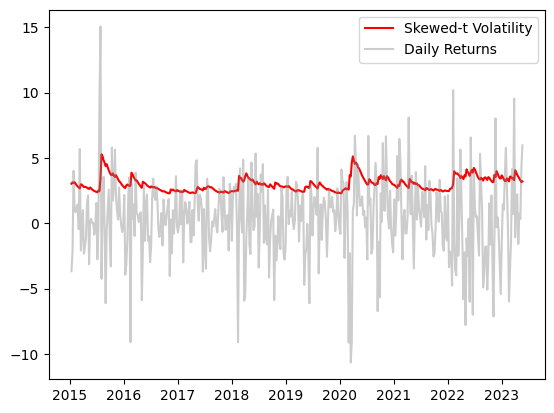

In [24]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['return_prc'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

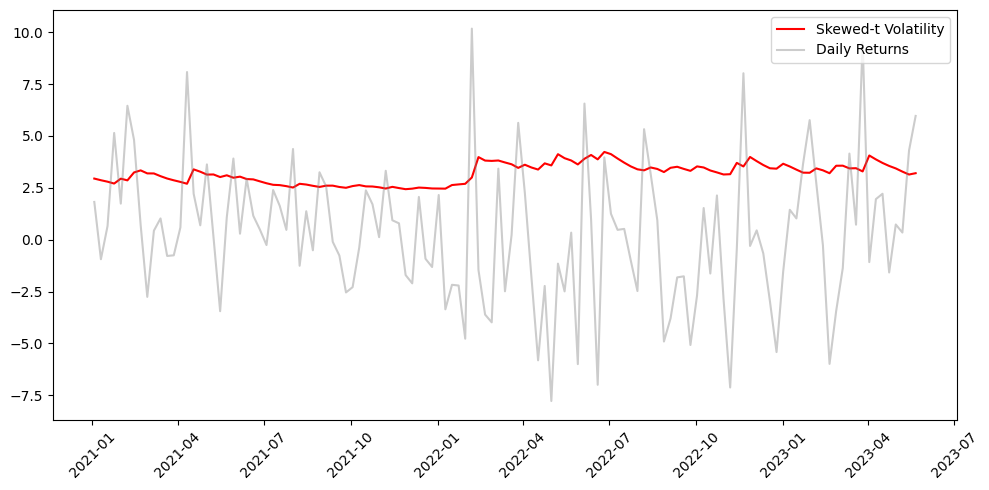

In [31]:
# Set the start date for the plot
start_date = pd.to_datetime('2021-01-01')

# Plot model fitting results
plt.figure(figsize=(10,5))  # Increase the size of the figure
plt.plot(skewt_vol[skewt_vol.index >= start_date], color = 'red', label = 'Skewed-t Volatility')
plt.plot(df.loc[df.index >= start_date, 'return_prc'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Automatically adjust subplot parameters for better visibility
plt.tight_layout()

plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


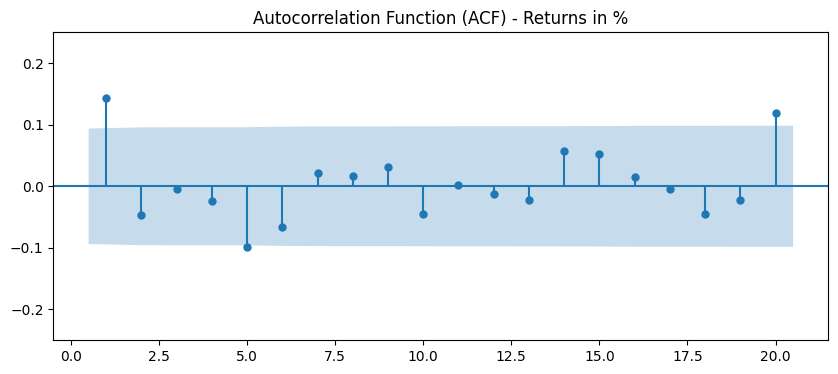

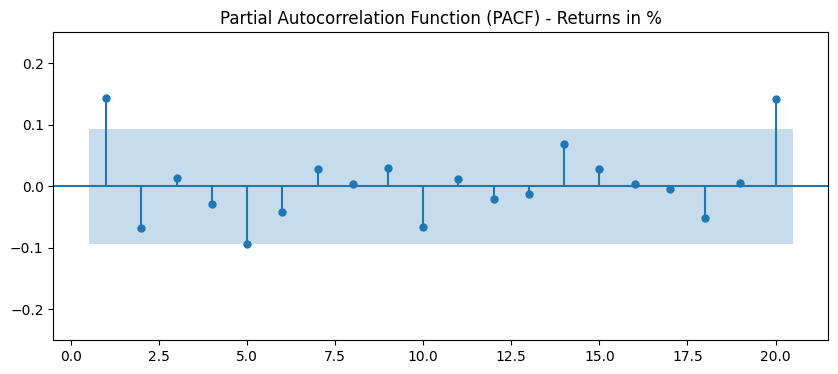

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Definim seria de timp a randamentului în procente
returns_pct = df['return_prc']

# Calculăm ACF și PACF
fig, ax1 = plt.subplots(figsize=(10, 4))
lag_acf = plot_acf(returns_pct, lags=20, zero=False, ax=ax1)
ax1.set_ylim(-0.25, 0.25)

fig, ax2 = plt.subplots(figsize=(10, 4))
lag_pacf = plot_pacf(returns_pct, lags=20, zero=False, ax=ax2)
ax2.set_ylim(-0.25, 0.25)

# Adăugăm titluri la grafice
ax1.set_title('Autocorrelation Function (ACF) - Returns in %')
ax2.set_title('Partial Autocorrelation Function (PACF) - Returns in %')

# Afișăm graficele
plt.show()

In [26]:
import warnings
from arch import arch_model

# Lista pentru a stoca rezultatele modelelor
results = []

# Loop prin valorile lui p
for p in range(1, 7):
    try:
        # Fit the ARCH(p) model
        model = arch_model(df['return_prc'], vol='ARCH', p=p)
        model_fit = model.fit(disp='off')
        
        # Calculate the AIC
        aic = model_fit.aic
        
        # Append the results to the list
        results.append((p, aic))
    
    except:
        # In cazul in care modelul nu poate fi potrivit, adaugam o valoare mare pentru AIC
        results.append((p, float('inf')))

# Sortam rezultatele in ordine descrescatoare dupa AIC
results.sort(key=lambda x: x[1])

# Afisam rezultatele
for result in results:
    print(f"ARCH({result[0]}) - AIC: {result[1]}")

ARCH(5) - AIC: 2185.469204536447
ARCH(6) - AIC: 2186.141793972143
ARCH(2) - AIC: 2186.2069623621346
ARCH(3) - AIC: 2187.120051621966
ARCH(4) - AIC: 2188.9617475645164
ARCH(1) - AIC: 2191.9242607110536


In [33]:
# Display model fitting summary
print(model_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:             return_prc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1085.73
Distribution:                  Normal   AIC:                           2185.47
Method:            Maximum Likelihood   BIC:                           2214.03
                                        No. Observations:                  437
Date:                Thu, May 25 2023   Df Residuals:                      436
Time:                        21:38:43   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4776      0.147      3.255  1.136e-03 [  0.190,  0.76

Iteration:      1,   Func. Count:      9,   Neg. LLF: 1471.696824609412
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1202.4698506022148
Iteration:      3,   Func. Count:     29,   Neg. LLF: 1105.6607393043826
Iteration:      4,   Func. Count:     39,   Neg. LLF: 1096.7094170756334
Iteration:      5,   Func. Count:     48,   Neg. LLF: 6272.337539596265
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1086.444643290663
Iteration:      7,   Func. Count:     67,   Neg. LLF: 1090.5864282508885
Iteration:      8,   Func. Count:     76,   Neg. LLF: 1085.7774120718861
Iteration:      9,   Func. Count:     84,   Neg. LLF: 1085.7627324270911
Iteration:     10,   Func. Count:     92,   Neg. LLF: 1086.677013429137
Iteration:     11,   Func. Count:    101,   Neg. LLF: 1085.7524242373693
Iteration:     12,   Func. Count:    110,   Neg. LLF: 1085.734804992722
Iteration:     13,   Func. Count:    118,   Neg. LLF: 1085.7346059793817
Iteration:     14,   Func. Count:    126,   Neg. LLF: 10

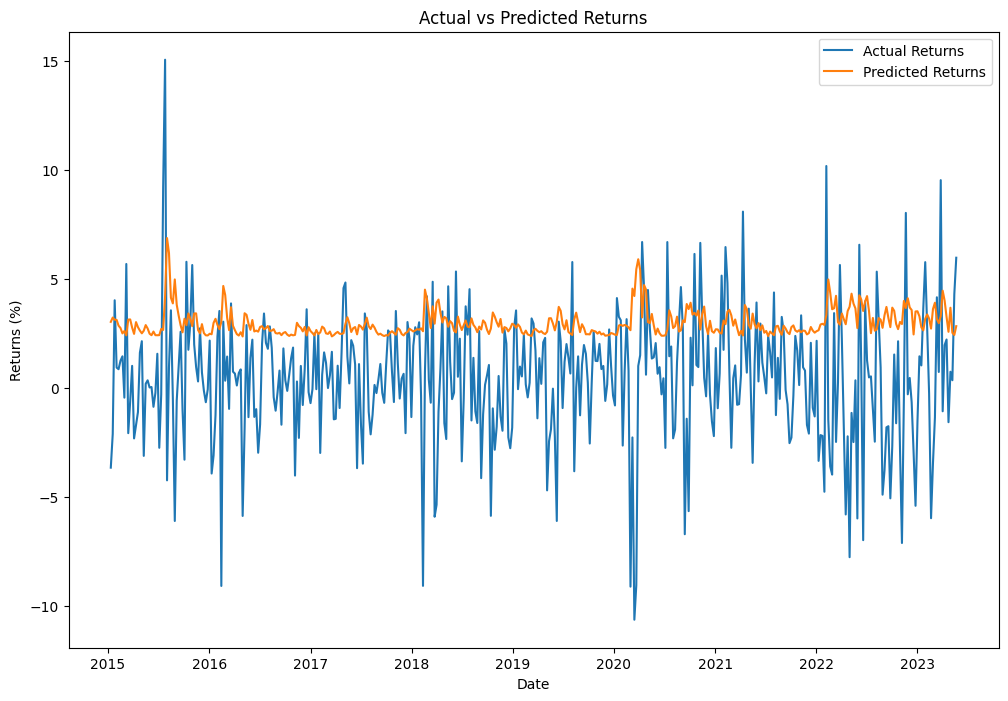

In [28]:
# Fit the ARCH(1) model
model = arch_model(df['return_prc'], vol='ARCH', p=5)
model_fit = model.fit()

# Get the predicted volatility
predicted_volatility = model_fit.conditional_volatility

# Plot the actual and predicted returns
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['return_prc'], label='Actual Returns')
plt.plot(df.index, predicted_volatility, label='Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


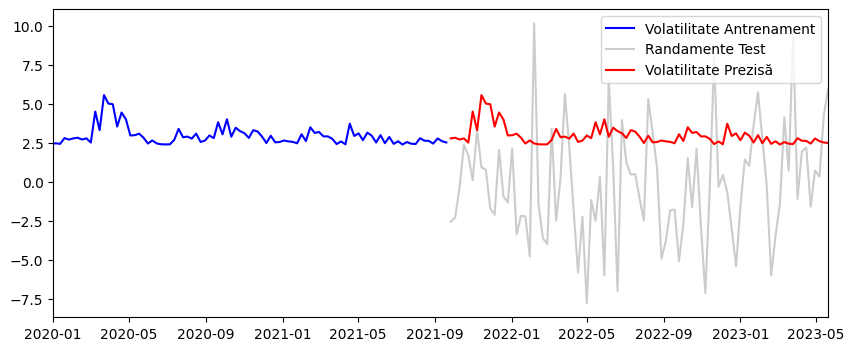

In [46]:
# Numărul de observații în datele de testare
test_size = int(len(df) * 0.2)

# Împarte datele în date de antrenament și de testare
train, test = df[:-test_size], df[-test_size:]

# Specifică modelul
gm = arch_model(train['return_prc'], p=5, q=0, mean='constant', vol='ARCH', dist='skewt')

# Antrenează modelul
model_fit = gm.fit(disp='off')

# Prezice volatilitatea
forecasts = model_fit.forecast(start=0, horizon=1)

# Obține volatilitatea prezisă
forecasted_vol = np.sqrt(forecasts.variance)

# Reprezentarea rezultatelor
plt.figure(figsize=(10,4))
plt.plot(train.index, model_fit.conditional_volatility, color='blue', label='Volatilitate Antrenament')
plt.plot(test.index, test['return_prc'], color='grey', label='Randamente Test', alpha=0.4)
plt.plot(test.index, forecasted_vol.iloc[-test_size:, -1], color='red', label='Volatilitate Prezisă')
plt.legend(loc='upper right')
start_date = '2020-01-01'
plt.xlim(pd.to_datetime(start_date), test.index.max())
plt.show()